In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Use this cell to write your code for Task 1

# Loading th file
house_sales = pd.read_csv('house_sales.csv')
display(house_sales.head())

# Checking for Null values
print(house_sales.isna().sum())

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8 sq.m.
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8 sq.m.
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5 sq.m.
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Det.,528.4 sq.m.
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1 sq.m.


house_id          0
city              0
sale_price        0
sale_date         0
months_listed    31
bedrooms          0
house_type        0
area              0
dtype: int64


In [3]:
# Filling Null values with mean imputation
mean_months = round(house_sales['months_listed'].mean(), 1)
house_sales['months_listed'] = house_sales['months_listed'].fillna(mean_months)
print(house_sales.isna().sum())
display(house_sales.head())

house_id         0
city             0
sale_price       0
sale_date        0
months_listed    0
bedrooms         0
house_type       0
area             0
dtype: int64


,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8 sq.m.
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8 sq.m.
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5 sq.m.
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Det.,528.4 sq.m.
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1 sq.m.


In [4]:
# Use this cell to write your code for Task 2
house_sales['city'] = house_sales['city'].str.replace('--', 'Unknown')
house_sales['sale_date'] = pd.to_datetime(house_sales['sale_date'])

# Replace values
house_sales['house_type'] = house_sales['house_type'].str.replace('Det.', 'Detached')
house_sales['house_type'] = house_sales['house_type'].str.replace('Semi', 'Semi-detached')
house_sales['house_type'] = house_sales['house_type'].str.replace('Terr.', 'Terraced')
house_sales['house_type'] = house_sales['house_type'].str.replace('Semi-detached-detached', 'Semi-detached')

In [7]:
house_sales.head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8 sq.m.
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8 sq.m.
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5 sq.m.
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Detached,528.4 sq.m.
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1 sq.m.


In [8]:
# Replacing sq.m. with '' 
house_sales['area'] = house_sales['area'].str.replace('sq.m.','').astype(float)

# Calculate the mean of the 'area' column
# mean_area = house_sales['area'].mean()

# Round the mean to one decimal place
# rounded_mean_area = round(mean_area, 1)

# Replace missing values in 'area' with the rounded mean
# house_sales.fillna({'area': rounded_mean_area}, inplace=True)

In [9]:
clean_data = house_sales

In [10]:
clean_data.head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Detached,528.4
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1


In [32]:
price_by_rooms = clean_data.groupby('bedrooms')['sale_price'].agg(
    avg_price='mean',
    var_price='var'
).round(1)
price_by_rooms = price_by_rooms.reset_index()
price_by_rooms

,bedrooms,avg_price,var_price
0,2,67076.4,5.652896e+08
1,3,154665.1,2.378289e+09
2,4,234704.6,1.725211e+09
3,5,301515.9,2.484328e+09
4,6,375741.3,3.924432e+09


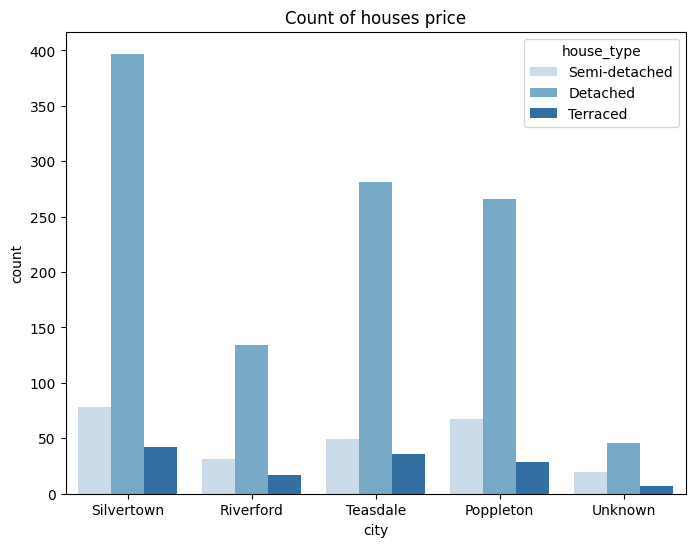

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(data=clean_data, x='city', hue='house_type', palette='Blues')
plt.title("Count of houses price")
plt.show()

In [13]:
# Import data
train_df = pd.read_csv('train.csv')
validation_df = pd.read_csv('validation.csv')

In [17]:
train_df = train_df.drop(columns=['sale_date','months_listed'], axis=1)

In [18]:
train_df.head(3)

,house_id,city,sale_price,bedrooms,house_type,area
0,1634561,Teasdale,401869,6,Detached,519.7
1,1009770,Silvertown,372387,6,Detached,507.8
2,1946667,Silvertown,325473,5,Detached,466.8


In [19]:
validation_df = validation_df.drop(columns=['sale_date','months_listed'], axis=1)

In [20]:
validation_df.head(3)

,house_id,city,bedrooms,house_type,area
0,1331375,Teasdale,3,Terraced,209.7
1,1630115,Teasdale,4,Detached,390.6
2,1645745,Silvertown,6,Detached,556.8


In [22]:
clean_data = clean_data.drop(columns=['house_id', 'sale_date', 'months_listed'], axis=1)

In [24]:
clean_data.head()

,city,sale_price,bedrooms,house_type,area
0,Silvertown,55943,2,Semi-detached,107.8
1,Silvertown,384677,5,Detached,498.8
2,Riverford,281707,6,Detached,542.5
3,Silvertown,373251,6,Detached,528.4
4,Silvertown,328885,5,Detached,477.1


In [34]:
# One-Hot-Encoding 
encoded_df = pd.get_dummies(clean_data, dtype='int')

X = encoded_df.drop(columns=['sale_price'], axis=1)
y = encoded_df['sale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lr_pred = lin_reg.predict(X_test)

# Evaluate the model
mse_linear = mean_squared_error(lr_pred, y_test)
r2_linear = r2_score(lr_pred, y_test)
rmse_linear = np.sqrt(mse_linear)

# Print the evaluation metrics
print(f"Mean Squared Error of Linear Regression: {mse_linear:.2f}")
print(f"R-squared (R2) Score of Linear Regression: {r2_linear:.2f}")
print(f"RMSE of Linear Regression:, {rmse_linear:.2f}\n")

# RandomForestRegressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)

# Evaluate the model
mse_random_forest = mean_squared_error(rf_pred, y_test)
r2_random_forest = r2_score(rf_pred, y_test)
rmse_random_forest = np.sqrt(mse_random_forest) 

# Print the evaluation metrics
print(f"Mean Squared Error of Random Forest: {mse_random_forest:.2f}")
print(f"R-squared of Random Forest: {r2_random_forest:.2f}")
print(f"RMSE of Random Forest: {rmse_random_forest:.2f}\n")

# DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_train, y_train)
dt_pred = dec_tree.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(dt_pred, y_test)
r2_dt = r2_score(dt_pred, y_test)
rmse_dt = np.sqrt(mse_dt)

# Print the evaluation metrics
print(f"Mean Squared Error of Decision Tree: {mse_dt:.2f}")
print(f"R-squared of Decision Tree: {r2_dt:.2f}")
print((f"RMSE of Decision Tree: {rmse_dt:.2f}\n"))

# GradientBoostingRegressor
gr_boost = GradientBoostingRegressor(random_state=42)
gr_boost.fit(X_train, y_train)
gb_pred = gr_boost.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(gb_pred, y_test)
r2_gb = r2_score(gb_pred, y_test)
rmse_gb = np.sqrt(mse_gb) 

# Print the evaluation metrics
print(f"Mean Squared Error of Gradient Boosting: {mse_gb:.2f}")
print(f"R-squared of Gradient Boosting: {r2_gb:.2f}")
print(f"RMSE of Gradient Boosting: {rmse_gb:.2f}")

Mean Squared Error of Linear Regression: 487535196.00
R-squared (R2) Score of Linear Regression: 0.96
RMSE of Linear Regression:, 22080.20

Mean Squared Error of Random Forest: 331196870.60
R-squared of Random Forest: 0.97
RMSE of Random Forest: 18198.82

Mean Squared Error of Decision Tree: 509200517.66
R-squared of Decision Tree: 0.96
RMSE of Decision Tree: 22565.47

Mean Squared Error of Gradient Boosting: 262839093.01
R-squared of Gradient Boosting: 0.98
RMSE of Gradient Boosting: 16212.31


In [28]:
train_dummies = pd.get_dummies(train_df, dtype='int')
train_dummies.head()

,house_id,sale_price,bedrooms,area,city_Poppleton,city_Riverford,city_Silvertown,city_Teasdale,house_type_Detached,house_type_Semi-detached,house_type_Terraced
0,1634561,401869,6,519.7,0,0,0,1,1,0,0
1,1009770,372387,6,507.8,0,0,1,0,1,0,0
2,1946667,325473,5,466.8,0,0,1,0,1,0,0
3,1798290,349469,5,499.4,0,0,1,0,1,0,0
4,1533461,199995,4,335.0,1,0,0,0,1,0,0


In [30]:
validation_dummies = pd.get_dummies(validation_df, dtype='int')
validation_dummies.head()

,house_id,bedrooms,area,city_Poppleton,city_Riverford,city_Silvertown,city_Teasdale,house_type_Detached,house_type_Semi-detached,house_type_Terraced
0,1331375,3,209.7,0,0,0,1,0,0,1
1,1630115,4,390.6,0,0,0,1,1,0,0
2,1645745,6,556.8,0,0,1,0,1,0,0
3,1336775,3,208.3,0,0,1,0,0,1,0
4,1888274,4,389.2,0,0,1,0,1,0,0
